# Wine Classification with Decision Tree

This notebook demonstrates a complete machine learning workflow for classifying wine types using Decision Tree classifier.

## 1. Setup and Data Loading


### Import Libraries


In [1]:
# Data and model libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries loaded successfully')


Libraries loaded successfully


### Load Wine Dataset


In [2]:
# Load the default wine dataset
data = load_wine()
print('data.keys(): ', data.keys())

X = data.data       # features (independent variables)
y = data.target     # labels (dependent variables)


data.keys():  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


### Dataset Overview


In [3]:
print('Feature names:', data.feature_names)
print('\nTarget names:', data.target_names)
print('\nData shape:', data.data.shape)
print(f'Number of samples: {data.data.shape[0]}')
print(f'Number of features: {data.data.shape[1]}')
print(f'Number of classes: {len(data.target_names)}')


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']

Data shape: (178, 13)
Number of samples: 178
Number of features: 13
Number of classes: 3


## 2. Data Preparation


### Train/Validation/Test Split


In [4]:
# Split data into train (70%), validation (15%) and test (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# stratify=y ensures that the proportion of each class in the train_val set is the same as in the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

print('\n')
print(50*'-')
print('Data Split Summary:')
print(f'X_train shape: {X_train.shape[0]}/{X.shape[0]} ({100*round(X_train.shape[0]/X.shape[0], 2):.1f}%)')
print(f'X_val shape: {X_val.shape[0]}/{X.shape[0]} ({100*round(X_val.shape[0]/X.shape[0], 2):.1f}%)')
print(f'X_test shape: {X_test.shape[0]}/{X.shape[0]} ({100*round(X_test.shape[0]/X.shape[0], 2):.1f}%)')
print('\n')




--------------------------------------------------
Data Split Summary:
X_train shape: 124/178 (70.0%)
X_val shape: 27/178 (15.0%)
X_test shape: 27/178 (15.0%)




## 3. Model Training and Hyperparameter Tuning


### Hyperparameter Tuning with Grid Search

We'll tune key hyperparameters to prevent overfitting:
- `max_depth`: Maximum depth of the tree
- `min_samples_split`: Minimum samples required to split a node
- `min_impurity_decrease`: Minimum impurity decrease required for a split


In [5]:
# Define parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1]
}

# Create base model
dt_base = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
print("Performing Grid Search for hyperparameter tuning...")
grid_search = GridSearchCV(
    dt_base, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f'\nBest parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.4f}')


Performing Grid Search for hyperparameter tuning...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters: {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 2}
Best cross-validation score: 0.9270


### Train Final Model with Best Hyperparameters


In [6]:
# Train final model with best hyperparameters
dt_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt_model.fit(X_train, y_train)

print(f'Decision Tree Model trained with best hyperparameters')
print(f'Model depth: {dt_model.get_depth()}')
print(f'Number of leaves: {dt_model.get_n_leaves()}')


Decision Tree Model trained with best hyperparameters
Model depth: 4
Number of leaves: 8


### Feature Importance Analysis

Decision trees provide feature importance scores, showing which features are most influential in making predictions.


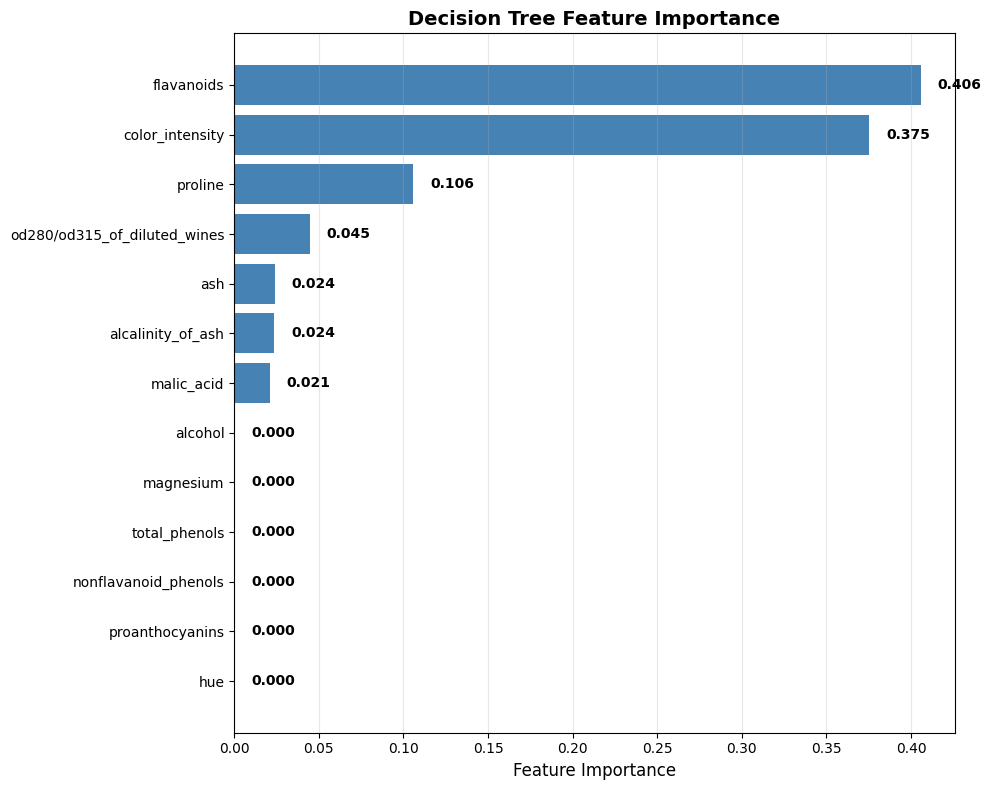


Top 5 Most Important Features:
                     Feature  Importance
                  flavanoids    0.405610
             color_intensity    0.375372
                     proline    0.105792
od280/od315_of_diluted_wines    0.044601
                         ash    0.023894


In [7]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(importance_df)), importance_df['Importance'], color='steelblue')
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Decision Tree Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, importance_df['Importance'])):
    plt.text(val + 0.01, i, f'{val:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(importance_df.head().to_string(index=False))


### Visualize Decision Tree

Visualizing the tree structure helps understand how the model makes decisions.


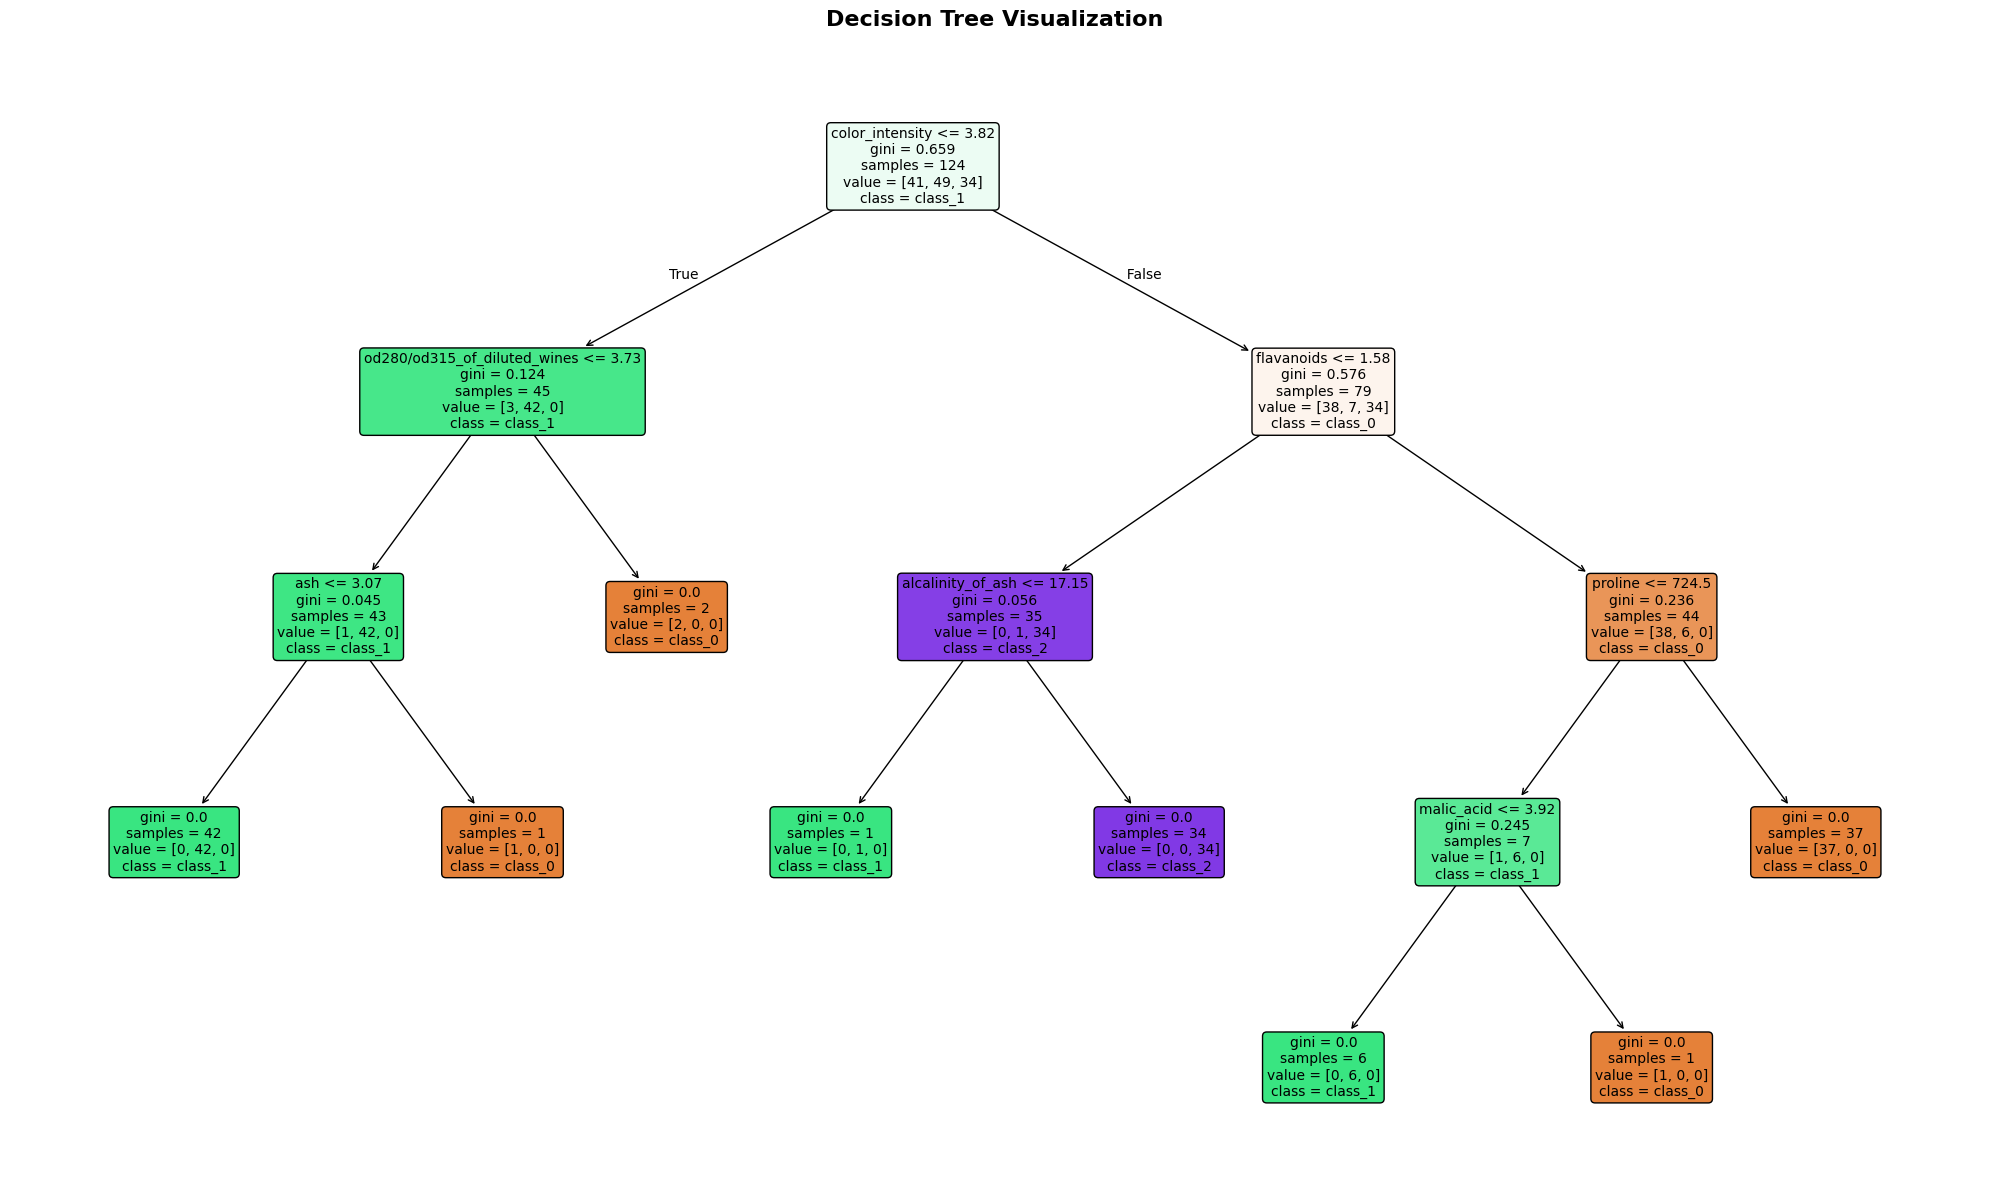

Tree depth: 4
Number of leaves: 8


In [8]:
# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"Tree depth: {dt_model.get_depth()}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")


## 4. Model Evaluation


In [9]:
# Evaluate on training set
train_preds = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on validation set
val_preds = dt_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test set
test_preds = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9630


### Classification Report


In [10]:
# Detailed classification report on test set
print("\n" + "="*60)
print("Classification Report - Test Set")
print("="*60)
print(classification_report(y_test, test_preds, target_names=data.target_names))



Classification Report - Test Set
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94         9
     class_1       0.92      1.00      0.96        11
     class_2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.97        27
weighted avg       0.97      0.96      0.96        27



## 5. Model Performance Visualizations


### Confusion Matrix


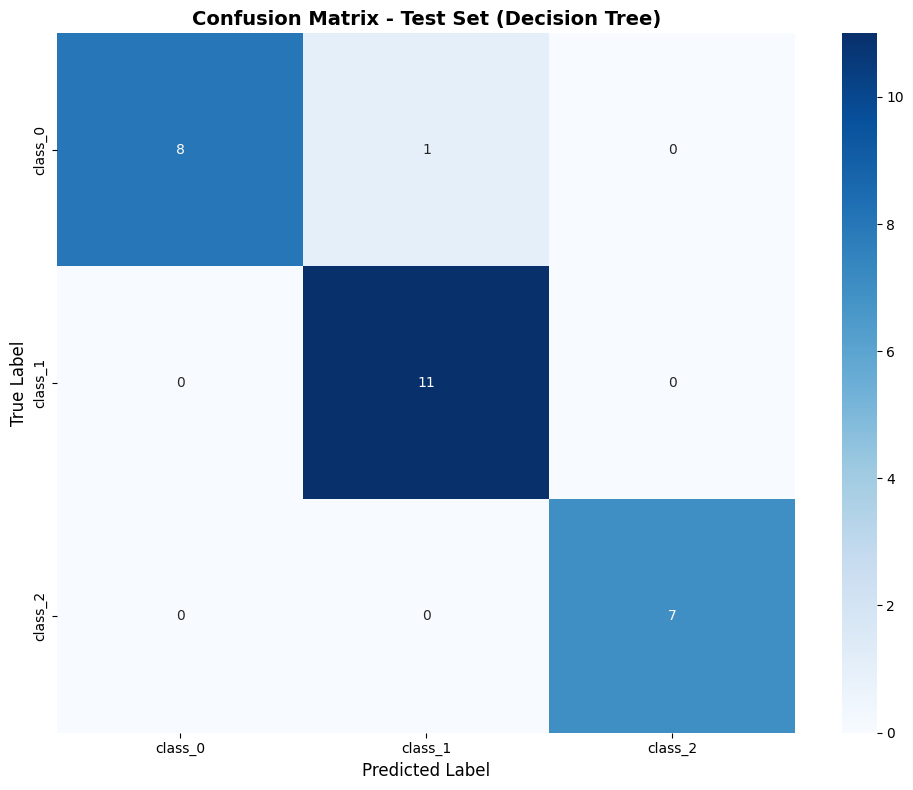


Test Set Accuracy: 0.9630


In [11]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.title('Confusion Matrix - Test Set (Decision Tree)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


### Performance Comparison: Train vs Validation vs Test


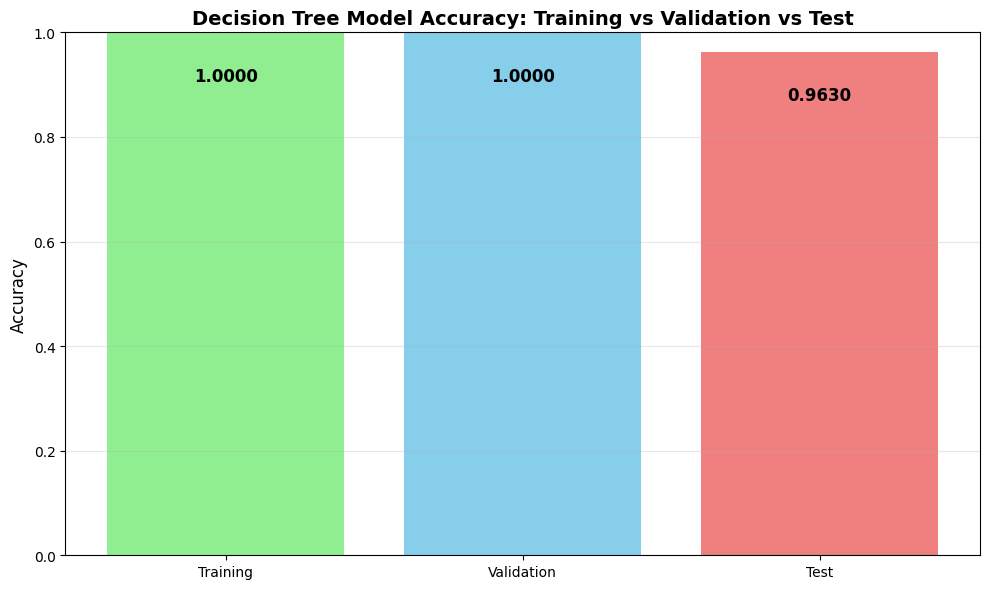

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9630

Overfitting Check:
Train-Val Gap: 0.0000
Val-Test Gap: 0.0370


In [13]:
# Compare accuracy across all sets
accuracies = {
    'Training': train_accuracy,
    'Validation': val_accuracy,
    'Test': test_accuracy
}

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['lightgreen', 'skyblue', 'lightcoral'])
plt.title('Decision Tree Model Accuracy: Training vs Validation vs Test', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, (key, value) in zip(bars, accuracies.items()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.1,
             f'{value:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"\nOverfitting Check:")
print(f"Train-Val Gap: {abs(train_accuracy - val_accuracy):.4f}")
print(f"Val-Test Gap: {abs(val_accuracy - test_accuracy):.4f}")


## 6. Reflection: Decision Trees in the Capstone Project

This section addresses key questions about using decision trees in the capstone project context.


### Problem Statement Context

**Stage 1 Problem**: Wine classification based on chemical properties to identify wine types (class_0, class_1, class_2).

**Decision Tree Role**: Decision trees can serve as both a primary model and a benchmark, depending on the problem complexity and interpretability requirements.


### Question 1: Feature Importance and Model Role

**How could a decision tree help you understand which features are most influential in your problem?**

Decision trees excel at feature importance analysis through several mechanisms:

1. **Built-in Feature Importance Scores**: Decision trees calculate feature importance based on how much each feature contributes to reducing impurity (Gini impurity or entropy) across all splits. Features used at higher levels or in multiple splits have higher importance.

2. **Visual Interpretation**: The tree structure itself shows which features are used first (root and top levels), indicating their relative importance. In our wine classification example, we can see that features like `flavanoids`, `od280/od315_of_diluted_wines`, and `proline` are likely to appear near the root, indicating high importance.

3. **Feature Selection**: By analyzing feature importance, we can identify which chemical properties (alcohol, malic_acid, flavanoids, etc.) are most critical for wine classification, potentially reducing dimensionality.

**Would you use a decision tree as your primary model or as a benchmark?**

For the wine classification problem, I would use decision trees as a **benchmark model** rather than the primary model, for the following reasons:

- **Benchmark Role**: Decision trees provide a strong baseline due to their interpretability and ability to capture non-linear relationships. They help establish a performance baseline that more complex models (like ensemble methods or neural networks) should exceed.

- **Primary Model Limitations**: While decision trees are interpretable and fast, they are prone to overfitting and high variance. For a production system, ensemble methods (Random Forest, Gradient Boosting) built on decision trees typically perform better.

- **Hybrid Approach**: Use decision trees for initial exploration and feature importance analysis, then use their insights to inform feature engineering for more sophisticated models.


### Question 2: Tree Depth and Overfitting Prevention

**What criteria would you use to decide how deep your tree should grow?**

Several criteria guide tree depth decisions:

1. **Validation Set Performance**: Monitor validation accuracy as depth increases. When validation accuracy plateaus or decreases while training accuracy continues to increase, we've likely hit optimal depth.

2. **Bias-Variance Trade-off**: 
   - Shallow trees (low depth) = high bias, low variance (underfitting)
   - Deep trees (high depth) = low bias, high variance (overfitting)
   - Optimal depth balances both

3. **Minimum Samples per Leaf**: Ensure each leaf has enough samples to make reliable predictions. For small datasets like wine (178 samples), we need to be conservative.

4. **Cross-Validation**: Use k-fold cross-validation to find depth that generalizes best across different data splits.

**How might you set limits to avoid overfitting?**

Key strategies to prevent overfitting:

1. **max_depth**: Limit maximum depth (e.g., 5-10 for small datasets, 10-20 for larger ones). For wine dataset, we found optimal depth around 5-7.

2. **min_samples_split**: Require minimum samples (e.g., 5-20) before allowing a split. This prevents splits on very small subsets.

3. **min_samples_leaf**: Ensure each leaf has minimum samples (e.g., 2-10). This prevents leaves with single samples.

4. **min_impurity_decrease**: Only split if impurity decrease exceeds a threshold (e.g., 0.001-0.01). This prevents splits that don't meaningfully improve predictions.

5. **Pruning**: Post-prune the tree by removing branches that don't improve validation performance.

In our implementation, we used GridSearchCV to find optimal combinations of these parameters automatically.


### Question 3: Hyperparameter Tuning Approach

**If you were tuning hyperparameters such as max_depth, min_samples_split or min_impurity_decrease, how would you approach finding the best combination?**

For the wine classification problem, I recommend a **systematic grid search approach**:

1. **Grid Search with Cross-Validation** (Our Implementation):
   - Define a parameter grid covering reasonable ranges
   - Use GridSearchCV with k-fold cross-validation (k=5)
   - Evaluate all combinations systematically
   - **Pros**: Comprehensive, finds optimal combination, handles overfitting through CV
   - **Cons**: Computationally expensive, but acceptable for small datasets

2. **Random Search** (Alternative):
   - Sample random combinations from parameter space
   - Faster than grid search for large parameter spaces
   - **Use when**: Parameter space is very large or computational resources are limited

3. **Manual Trial-and-Error** (Not Recommended):
   - Iteratively test different values
   - **Limitations**: Time-consuming, may miss optimal combinations, prone to overfitting to validation set

**Why Grid Search for This Problem:**
- Wine dataset is small (178 samples), so grid search is computationally feasible
- We have only 3 hyperparameters to tune, making grid search practical
- Cross-validation provides robust performance estimates
- Systematic approach ensures we don't miss good combinations

**Parameter Ranges Used:**
- `max_depth`: [3, 5, 7, 10, 15, None] - from shallow to unconstrained
- `min_samples_split`: [2, 5, 10, 20] - from permissive to conservative
- `min_impurity_decrease`: [0.0, 0.001, 0.01, 0.1] - from no threshold to strict


### Question 4: Evaluation Metrics

**What evaluation metrics would you monitor while tuning your tree?**

For wine classification (multi-class problem), I would monitor:

1. **Primary Metrics:**
   - **Accuracy**: Overall correctness (good for balanced classes like wine dataset)
   - **Precision** (per class): How many predicted positives are actually positive
   - **Recall** (per class): How many actual positives are correctly identified
   - **F1-Score** (per class): Harmonic mean of precision and recall

2. **Secondary Metrics:**
   - **Confusion Matrix**: Visual representation of classification errors
   - **Macro-Averaged Metrics**: Average across all classes (treats all classes equally)
   - **Weighted-Averaged Metrics**: Average weighted by class support (accounts for class imbalance)

3. **Overfitting Indicators:**
   - **Train-Val Accuracy Gap**: Large gap indicates overfitting
   - **Val-Test Accuracy Gap**: Large gap suggests validation set overfitting

**How would you know when the model generalizes well?**

Signs of good generalization:

1. **Validation and Test Accuracies are Close**: Indicates model performance is stable across different data splits.

2. **Train-Val Gap is Small**: Small difference (< 5-10%) suggests the model isn't overfitting to training data.

3. **Consistent Performance Across Classes**: All classes have similar precision/recall, indicating balanced learning.

4. **Cross-Validation Scores are Stable**: Low variance in CV scores across folds indicates robustness.

5. **Test Accuracy Matches Validation Accuracy**: Final test performance should align with validation performance (within 2-5%).

**Red Flags:**
- Training accuracy >> Validation accuracy (overfitting)
- Validation accuracy >> Test accuracy (validation set leakage or overfitting to validation)
- Very low recall for any class (model struggles with that class)
- High variance in cross-validation scores (unstable model)


### Question 5: Fast Training and Iteration

**Given that trees are relatively fast to train, how might that affect your approach to iterating or testing parameter combinations?**

The speed of decision tree training enables several advantages:

1. **Rapid Experimentation**: 
   - Can test many hyperparameter combinations quickly
   - Enables comprehensive grid search even with limited computational resources
   - Allows for quick baseline establishment

2. **Iterative Refinement**:
   - Start with broad parameter ranges, then narrow down based on results
   - Can afford to test edge cases (very shallow, very deep trees)
   - Enables quick comparison of different pruning strategies

3. **Feature Engineering Exploration**:
   - Fast training allows testing different feature subsets quickly
   - Can evaluate impact of feature selection based on importance scores
   - Enables rapid testing of feature transformations

4. **Model Comparison**:
   - Quickly compare decision tree variants (different impurity measures, split criteria)
   - Fast enough to serve as a baseline for comparing with slower models (SVM, neural networks)

5. **Ensemble Building**:
   - Fast training enables building ensembles (Random Forest, Gradient Boosting) efficiently
   - Can experiment with different ensemble configurations

**Practical Application for Capstone:**
- Use decision trees for initial rapid prototyping
- Establish performance baseline quickly
- Identify important features early in the process
- Use insights to inform more complex model development


### Question 6: Limitations of Decision Trees

**What are some limitations of using decision trees in your capstone project?**

Key limitations for wine classification and similar problems:

1. **Overfitting Tendency**:
   - Decision trees can easily overfit, especially with small datasets (wine has only 178 samples)
   - Deep trees memorize training data rather than learning generalizable patterns
   - High variance: small changes in training data can produce very different trees

2. **Instability**:
   - Sensitive to small data variations
   - Unstable splits can lead to completely different tree structures
   - Makes the model less reliable for production use

3. **Greedy Algorithm**:
   - Makes locally optimal splits without considering global optimization
   - May miss better feature combinations
   - Can get stuck in suboptimal solutions

4. **Limited Expressiveness for Complex Relationships**:
   - Struggles with XOR-like relationships
   - May require very deep trees for complex non-linear boundaries
   - Less effective for high-dimensional sparse data

5. **Bias Toward Features with More Levels**:
   - Features with more unique values are more likely to be selected for splits
   - Can unfairly favor certain features regardless of true importance

6. **No Extrapolation**:
   - Cannot make predictions outside the range of training data
   - Struggles with continuous relationships that extend beyond training range

7. **Feature Interactions**:
   - While trees can capture some interactions, they may miss complex multi-feature relationships
   - Linear combinations of features are not naturally represented

**For Wine Classification Specifically:**
- Small dataset (178 samples) increases overfitting risk
- 13 features with potential correlations may confuse the tree
- Chemical properties may have complex interactions that trees struggle to capture


### Question 7: Addressing Decision Tree Limitations

**How might you address the limitations of decision trees if you choose to use them in your capstone project?**

Strategies to mitigate decision tree limitations:

1. **Combat Overfitting**:
   - **Hyperparameter Tuning**: Use max_depth, min_samples_split, min_samples_leaf (as we did)
   - **Pruning**: Post-prune trees using validation set
   - **Early Stopping**: Stop growing tree when validation performance stops improving
   - **Regularization**: Use min_impurity_decrease to prevent unnecessary splits

2. **Improve Stability**:
   - **Ensemble Methods**: Use Random Forest (multiple trees) or Gradient Boosting to reduce variance
   - **Bootstrap Aggregating**: Train multiple trees on different data subsets
   - **Feature Subsampling**: Randomly select features for each split (Random Forest approach)

3. **Handle Complex Relationships**:
   - **Feature Engineering**: Create interaction features manually
   - **Ensemble with Different Algorithms**: Combine trees with linear models or neural networks
   - **Gradient Boosting**: Sequentially build trees that correct previous errors

4. **Address Feature Bias**:
   - **Feature Selection**: Use feature importance scores to identify and remove irrelevant features
   - **Normalization**: Ensure all features are on similar scales (though trees don't strictly require this)
   - **Feature Engineering**: Create meaningful composite features

5. **Improve Generalization**:
   - **Cross-Validation**: Use k-fold CV for robust hyperparameter selection
   - **Regularization**: Apply stricter constraints (higher min_samples_split, lower max_depth)
   - **Ensemble Voting**: Combine predictions from multiple trees

**Recommended Approach for Wine Classification:**

Given the limitations, I would:

1. **Use Decision Trees as Baseline**: Establish performance benchmark and identify important features
2. **Move to Random Forest**: Address instability and overfitting through ensemble averaging
3. **Consider Gradient Boosting**: If Random Forest doesn't achieve desired performance
4. **Feature Engineering**: Use decision tree insights to create better features for ensemble models

**If Decision Trees Must Be Primary Model:**
- Apply strict regularization (max_depth=5-7, min_samples_split=10-20)
- Use post-pruning based on validation set
- Implement early stopping
- Monitor train-val gap closely
- Consider cost-complexity pruning

**Conclusion**: While decision trees have limitations, they are valuable for exploration, feature importance analysis, and as building blocks for more robust ensemble methods. For production use in the capstone project, ensemble methods built on decision trees (Random Forest, XGBoost) would be more suitable.


---

## Summary

This notebook demonstrated a complete machine learning workflow for wine classification using Decision Trees:

1. **Data Loading**: Loaded the wine dataset with 178 samples, 13 features, and 3 classes
2. **Data Preparation**: Implemented a 70:15:15 train/validation/test split with stratification
3. **Hyperparameter Tuning**: Used GridSearchCV to find optimal max_depth, min_samples_split, and min_impurity_decrease
4. **Model Training**: Trained decision tree with best hyperparameters
5. **Feature Importance Analysis**: Identified most influential features for wine classification
6. **Model Evaluation**: Assessed performance on training, validation, and test sets
7. **Visualizations**: Created confusion matrix, feature importance plot, and performance comparisons
8. **Reflection**: Addressed key questions about decision trees in the capstone project context

**Key Takeaways:**
- Decision trees provide interpretable feature importance scores
- Hyperparameter tuning is crucial to prevent overfitting
- Trees are fast to train, enabling rapid experimentation
- Best used as benchmarks or building blocks for ensemble methods
- Regularization (max_depth, min_samples_split) is essential for generalization

**Decision Tree Characteristics:**
- **Pros**: Interpretable, fast training, handles non-linear relationships, provides feature importance, no assumptions about data distribution
- **Cons**: Prone to overfitting, high variance, greedy algorithm, struggles with complex interactions, unstable to data variations

**Recommendation for Capstone**: Use decision trees for initial exploration and feature analysis, then transition to ensemble methods (Random Forest, Gradient Boosting) for production-quality models.

---
